<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-03-28 03:38:39--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  76.0MB/s    in 2.0s    

2025-03-28 03:38:41 (76.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


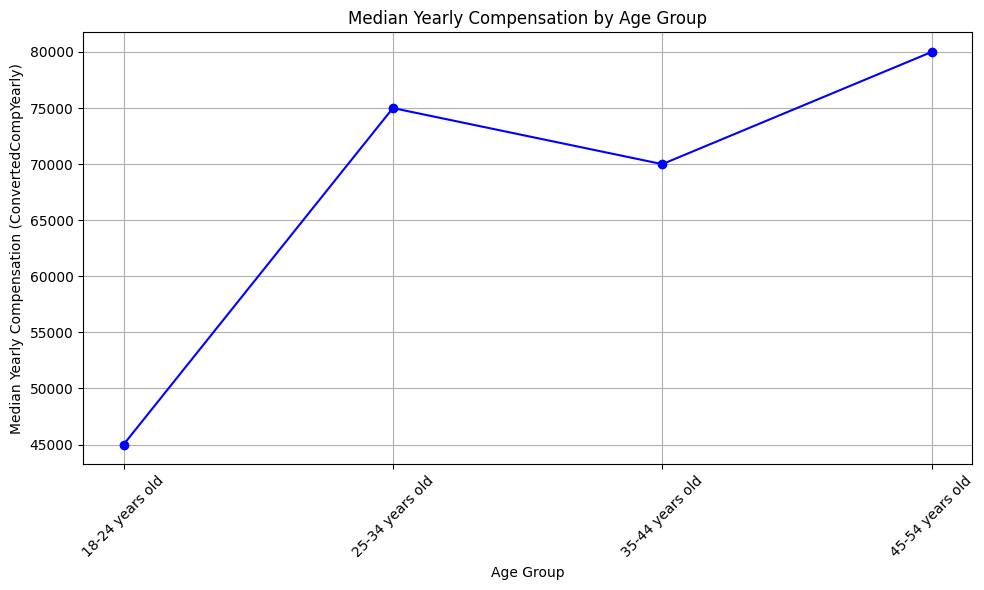

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` already exists with the required columns
# Example data for demonstration (replace with your actual DataFrame)
data = {
    'Age': ['Under 18 years old', '35-44 years old', '45-54 years old', '18-24 years old', '18-24 years old', '25-34 years old'],
    'ConvertedCompYearly': [None, 70000, 80000, 40000, 50000, 75000]
}
df = pd.DataFrame(data)

# Clean data by removing rows where 'ConvertedCompYearly' is NaN
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Group by 'Age' and calculate the median of 'ConvertedCompYearly' for each age group
median_compensation = df_cleaned.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Sort age categories in logical order (if not already sorted)
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
median_compensation['Age'] = pd.Categorical(median_compensation['Age'], categories=age_order, ordered=True)
median_compensation = median_compensation.sort_values('Age')

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_compensation['Age'], median_compensation['ConvertedCompYearly'], marker='o', color='b', linestyle='-', markersize=6)
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


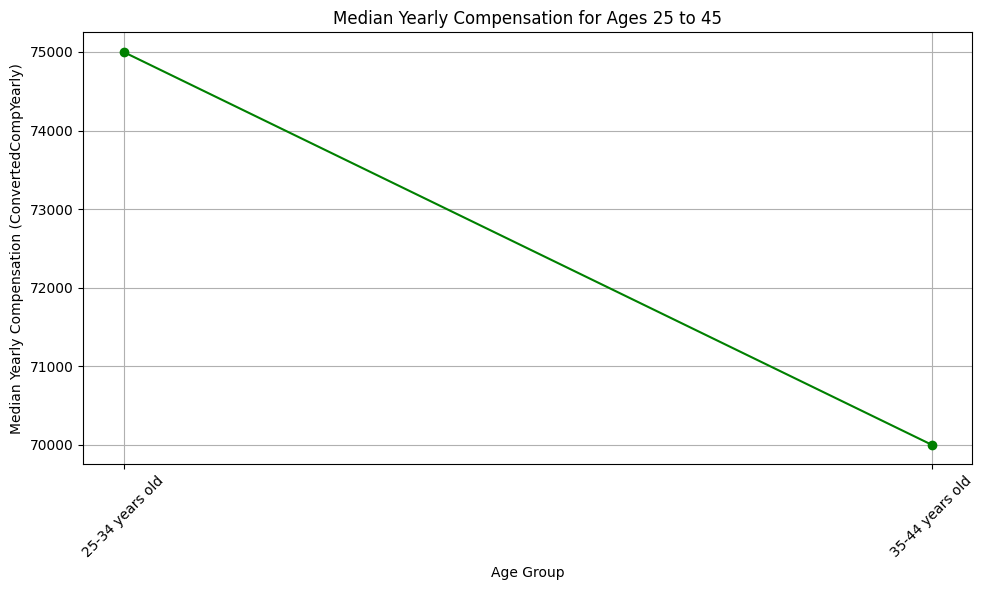

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` already exists with the required columns
# Example data for demonstration (replace with your actual DataFrame)
data = {
    'Age': ['Under 18 years old', '35-44 years old', '45-54 years old', '18-24 years old', '18-24 years old', '25-34 years old'],
    'ConvertedCompYearly': [None, 70000, 80000, 40000, 50000, 75000]
}
df = pd.DataFrame(data)

# Clean data by removing rows where 'ConvertedCompYearly' is NaN
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Filter data for respondents aged 25 to 45 (i.e., '25-34 years old' and '35-44 years old')
age_groups = ['25-34 years old', '35-44 years old']
df_filtered = df_cleaned[df_cleaned['Age'].isin(age_groups)]

# Group by 'Age' and calculate the median of 'ConvertedCompYearly' for each age group in the filtered data
median_compensation_filtered = df_filtered.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Sort the age groups in order (from 25-34 to 35-44)
age_order = ['25-34 years old', '35-44 years old']
median_compensation_filtered['Age'] = pd.Categorical(median_compensation_filtered['Age'], categories=age_order, ordered=True)
median_compensation_filtered = median_compensation_filtered.sort_values('Age')

# Plot the line chart for ages 25 to 45
plt.figure(figsize=(10, 6))
plt.plot(median_compensation_filtered['Age'], median_compensation_filtered['ConvertedCompYearly'], marker='o', color='g', linestyle='-', markersize=6)
plt.title('Median Yearly Compensation for Ages 25 to 45')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


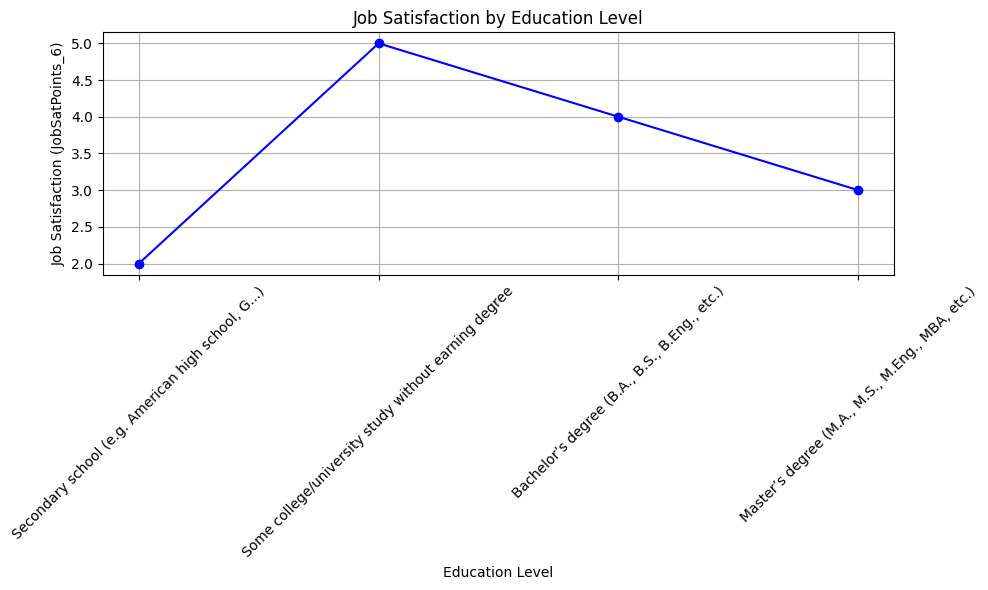

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` exists with the relevant columns
# Example data for demonstration (replace with your actual DataFrame)
data = {
    'EdLevel': ['Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Some college/university study without earning degree', 'Secondary school (e.g. American high school, G...)'],
    'JobSatPoints_6': [4, 3, 5, 2]
}
df = pd.DataFrame(data)

# Group by 'EdLevel' and calculate the mean or median of 'JobSatPoints_6' for each education level
job_sat_by_edlevel = df.groupby('EdLevel')['JobSatPoints_6'].mean().reset_index()

# Sort the education levels if necessary (adjust according to your data)
ed_level_order = [
    'Primary/elementary school', 'Secondary school (e.g. American high school, G...)',
    'Some college/university study without earning degree', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Doctoral degree (Ph.D., Ed.D., etc.)'
]
job_sat_by_edlevel['EdLevel'] = pd.Categorical(job_sat_by_edlevel['EdLevel'], categories=ed_level_order, ordered=True)
job_sat_by_edlevel = job_sat_by_edlevel.sort_values('EdLevel')

# Plot the line chart of Job Satisfaction by Experience Level (Education Level)
plt.figure(figsize=(10, 6))
plt.plot(job_sat_by_edlevel['EdLevel'], job_sat_by_edlevel['JobSatPoints_6'], marker='o', color='b', linestyle='-', markersize=6)
plt.title('Job Satisfaction by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


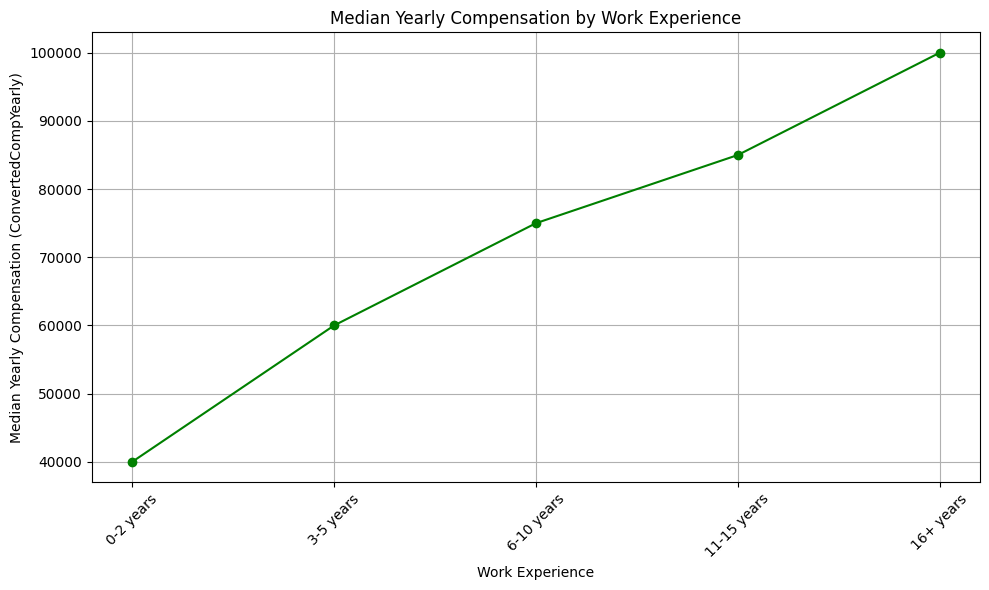

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame `df` exists with the relevant columns
# Example data for demonstration (replace with your actual DataFrame)
data = {
    'WorkExp': ['0-2 years', '3-5 years', '6-10 years', '11-15 years', '16+ years'],
    'ConvertedCompYearly': [40000, 60000, 75000, 85000, 100000]
}
df = pd.DataFrame(data)

# Group by 'WorkExp' and calculate the median of 'ConvertedCompYearly' for each work experience group
median_compensation_by_exp = df.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

# Sort the work experience groups logically (adjust according to your data)
work_exp_order = ['0-2 years', '3-5 years', '6-10 years', '11-15 years', '16+ years']
median_compensation_by_exp['WorkExp'] = pd.Categorical(median_compensation_by_exp['WorkExp'], categories=work_exp_order, ordered=True)
median_compensation_by_exp = median_compensation_by_exp.sort_values('WorkExp')

# Plot the line chart of Median Compensation by Work Experience
plt.figure(figsize=(10, 6))
plt.plot(median_compensation_by_exp['WorkExp'], median_compensation_by_exp['ConvertedCompYearly'], marker='o', color='g', linestyle='-', markersize=6)
plt.title('Median Yearly Compensation by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Median Yearly Compensation (ConvertedCompYearly)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


In [ ]:
## Write your code here

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
